## 『本次練習內容』
#### 使用Xception backbone做 Trnasfer Learning


## 『本次練習目的』
  #### 了解如何使用Transfer Learning
  #### 了解Transfer Learning的優點，可以觀察模型收斂速度

##### 可以自行嘗試多種架構

In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
import keras
from keras.layers import Input
 
from keras.datasets import cifar10
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder


input_tensor = Input(shape=(32, 32, 3))
#include top 決定要不要加入 fully Connected Layer

'''Xception 架構'''
model = keras.applications.xception.Xception(include_top=False, weights='imagenet', 
                                             input_tensor=input_tensor, 
                                             pooling=None, 
                                             classes=10)

'''Resnet 50 架構'''
#model=keras.applications.ResNet50(include_top=False, weights='imagenet',
                                    #input_tensor=input_tensor,
                                    #pooling=None, classes=10)
model.summary()


Using TensorFlow backend.


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 15, 15, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 15, 15, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 15, 15, 32)   0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

## 添加層數

In [2]:
#接上原本的output
x = model.output

'''可以參考Cifar10實作章節'''
#GlobalAveragePooling2D
x = GlobalAveragePooling2D()(x)
x = Dense(units=128, activation='relu')(x)
x=Dropout(p=0.1)(x)

predictions = Dense(units=10,activation='softmax')(x)
model = Model(inputs=model.input, outputs=predictions)

#可以先看看模型深度決定鎖定層數
print('Model深度：', len(model.layers))

Model深度： 136


c:\users\kennykang\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  


## 鎖定特定幾層不要更新權重

In [3]:
for layer in model.layers[:100]:
    layer.trainable = False
for layer in model.layers[100:]:
    layer.trainable = True

## 準備 Cifar 10 資料

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape) #(50000, 32, 32, 3)

## Normalize Data
def normalize(X_train,X_test):
        mean = np.mean(X_train,axis=(0,1,2,3))
        std = np.std(X_train, axis=(0, 1, 2, 3))
        X_train = (X_train-mean)/(std+1e-7)
        X_test = (X_test-mean)/(std+1e-7)
        return X_train, X_test
    
    
## Normalize Training and Testset    
x_train, x_test = normalize(x_train, x_test) 

## OneHot Label 由(None, 1)-(None, 10)
## ex. label=2,變成[0,0,1,0,0,0,0,0,0,0]
one_hot=OneHotEncoder()
y_train=one_hot.fit_transform(y_train).toarray()
y_test=one_hot.transform(y_test).toarray()

(50000, 32, 32, 3)


## Training

In [5]:
# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history  = model.fit(x_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
50000/50000 [==============================] - 48s 968us/step - loss: 1.4205 - acc: 0.5004
Epoch 2/100
50000/50000 [==============================] - 46s 927us/step - loss: 1.0227 - acc: 0.6503
Epoch 3/100
50000/50000 [==============================] - 45s 907us/step - loss: 0.9064 - acc: 0.6893
Epoch 4/100
50000/50000 [==============================] - 45s 907us/step - loss: 0.8209 - acc: 0.7185
Epoch 5/100
50000/50000 [==============================] - 45s 907us/step - loss: 0.7430 - acc: 0.7439
Epoch 6/100
50000/50000 [==============================] - 46s 925us/step - loss: 0.6707 - acc: 0.7693
Epoch 7/100
50000/50000 [==============================] - 45s 906us/step - loss: 0.6064 - acc: 0.7921
Epoch 8/100
50000/50000 [==============================] - 45s 906us/step - loss: 0.5503 - acc: 0.8118
Epoch 9/100
50000/50000 [==============================] - 45s 907us/step - loss: 0.4921 - acc: 0.8297
Epoch 10/100
50000/50000 [==============================] - 45s 906us/ste

50000/50000 [==============================] - 46s 921us/step - loss: 0.0734 - acc: 0.9758
Epoch 80/100
50000/50000 [==============================] - 45s 905us/step - loss: 0.0677 - acc: 0.9778
Epoch 81/100
50000/50000 [==============================] - 45s 906us/step - loss: 0.0719 - acc: 0.9762
Epoch 82/100
50000/50000 [==============================] - 46s 919us/step - loss: 0.0690 - acc: 0.9776
Epoch 83/100
50000/50000 [==============================] - 46s 918us/step - loss: 0.0724 - acc: 0.9766
Epoch 84/100
50000/50000 [==============================] - 45s 902us/step - loss: 0.0731 - acc: 0.9764
Epoch 85/100
50000/50000 [==============================] - 46s 913us/step - loss: 0.0668 - acc: 0.9782
Epoch 86/100
50000/50000 [==============================] - 45s 909us/step - loss: 0.0640 - acc: 0.9784
Epoch 87/100
50000/50000 [==============================] - 45s 908us/step - loss: 0.0693 - acc: 0.9771
Epoch 88/100
50000/50000 [==============================] - 45s 909us/step - 

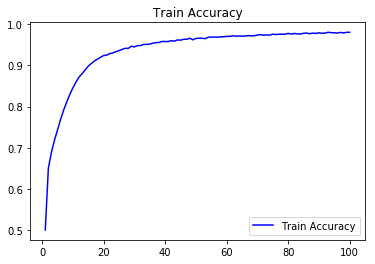

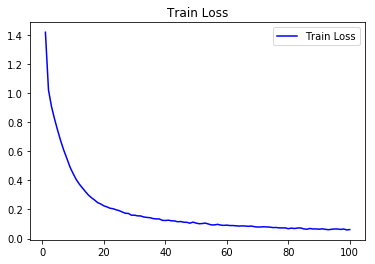

In [8]:
import matplotlib.pyplot as plt

train_acc = history.history['acc']
train_loss = history.history['loss']

epochs = range(1,101)
plt.plot(epochs,train_acc,'b',label='Train Accuracy')
plt.title('Train Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs,train_loss,'b',label='Train Loss')
plt.title('Train Loss')
plt.legend()